In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
kp = pd.read_csv('/content/KOPA.csv')
kp.head(10)

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
0,Product B,Male,Location 2,Region 2,16600,7/4/2014,2000,40,365,3121,4241,13621,Active
1,Product B,Male,Location 3,Region 3,16600,1/2/2015,2000,40,365,3061,4171,15041,Active
2,Product C,Female,Location 5,Region 5,15600,12/8/2012,1000,40,365,2160,3280,15340,Active
3,Product B,Male,Location 6,Region 1,16600,2/20/2015,2000,40,365,3041,4241,15321,Active
4,Product D,Female,Location 7,Region 2,20250,10/28/2013,2000,50,365,3470,4820,13720,Active
5,Product B,Female,Location 10,Region 2,16600,4/19/2015,2000,40,365,3201,4141,14141,Active
6,Product A,Male,Location 11,Region 3,20250,7/4/2016,2000,50,365,1851,3251,17701,Active
7,Product B,Male,Location 12,Region 6,16600,4/24/2014,2000,40,365,3971,4131,15351,Active
8,Product A,Female,Location 3,Region 3,22250,9/3/2015,4000,50,365,5750,7450,20250,Active
9,Product A,Female,Location 13,Region 6,20250,7/25/2016,2000,50,365,1951,3251,17351,Active


In [57]:
kp.isnull().sum()

Product           0
CustomerGender    0
Location          0
Region            0
TotalPrice        0
StartDate         0
Deposit           0
DailyRate         0
TotalDays         0
AmountPaid30      0
AmountPaid60      0
AmountPaid360     0
LoanStatus360     0
dtype: int64

In [58]:
kp.duplicated().sum()

0

In [74]:
kp.LoanStatus360.replace(['active'], [1], inplace =True)

In [59]:
# data exploration

In [60]:
kp_regression = kp.copy()
kp_classification = kp.copy()

In [61]:
cat_columns= [ column for column in kp_regression.columns if kp_regression[column].dtype == 'o']
cat_columns

[]

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
encoder = LabelEncoder()
for column in cat_columns:
  kp_regression[column] = encoder.fit_transform(kp_regression[column])

In [64]:
kp_regression.head(2)

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
0,Product B,Male,Location 2,Region 2,16600,7/4/2014,2000,40,365,3121,4241,13621,Active
1,Product B,Male,Location 3,Region 3,16600,1/2/2015,2000,40,365,3061,4171,15041,Active


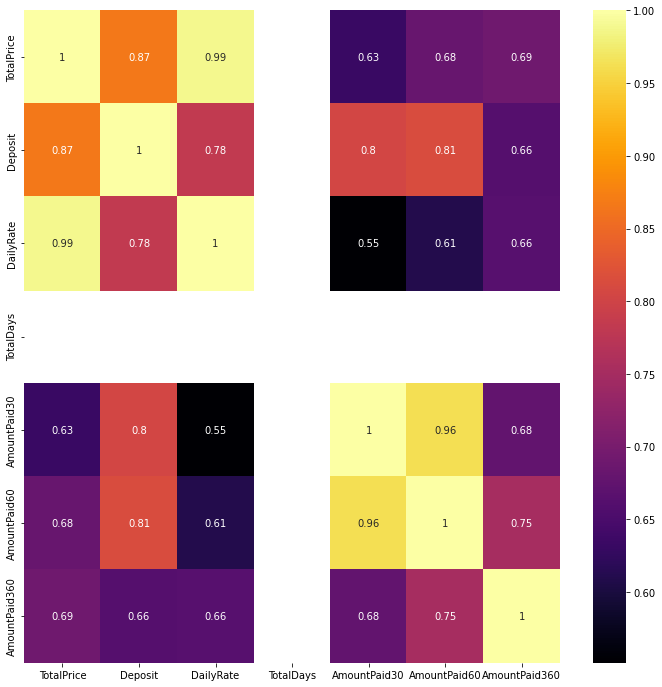

In [65]:
corr_matrix = kp_regression.corr()
plt.figure(figsize= (12,12))
sns.heatmap(corr_matrix, annot = True, cmap = 'inferno')

In [66]:
kp_regression.drop(['Location','StartDate','TotalDays',
                    'DailyRate','AmountPaid30'],
                   axis=1,
                   inplace=True)

In [67]:
kp_regression.head()

,Product,CustomerGender,Region,TotalPrice,Deposit,AmountPaid60,AmountPaid360,LoanStatus360
0,Product B,Male,Region 2,16600,2000,4241,13621,Active
1,Product B,Male,Region 3,16600,2000,4171,15041,Active
2,Product C,Female,Region 5,15600,1000,3280,15340,Active
3,Product B,Male,Region 1,16600,2000,4241,15321,Active
4,Product D,Female,Region 2,20250,2000,4820,13720,Active


In [68]:
x=kp_regression.drop('AmountPaid360',  axis=1)
y=kp_regression['AmountPaid360']


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [75]:
linear = LinearRegression()
linear.fit=(x_train, x_test)
predictions = linear.predict(x_test)
error = mean_squared_error(y_test, predictions)

NotFittedError: ignored